# Broadcasting
Broadcasting allows the performing of arithmetic operations on tensors that are not of the same size. Both NumPy and Pytorch automatically do the broadcasting of the ‘smaller’ tensor to the size of the ‘larger’ tensor, only if certain constraints are met.

## Rules for Broadcasting
Two tensors are compatible for broadcasting only if, when starting from the trailing dimensions of the tensors:
* If the dimensions of both the tensors are the same.
* If the dimension of one of the tensors is 1.



In [1]:
import torch
import numpy as np

## eg1
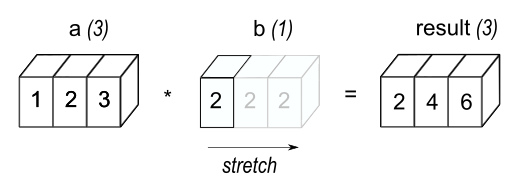

In [2]:
# NumPy
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

In [3]:
# NumPy
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

In [4]:
# NumPy(dimension of b of the tensors is not 1)
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0])
a * b

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [8]:
# Pytorch
A = torch.tensor([1, 2, 3])
B = torch.tensor([2, 2, 2])
D = A*B
print(D)

tensor([2, 4, 6])


In [9]:
# Pytorch
A = torch.tensor([1, 2, 3])
B = torch.tensor([2])
D = A*B
print(D)

tensor([2, 4, 6])


In [10]:
# Pytorch(dimension of b of the tensors is not 1)
A = torch.tensor([1, 2, 3])
B = torch.tensor([2, 2])
D = A*B
print(D)

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 0

## eg2
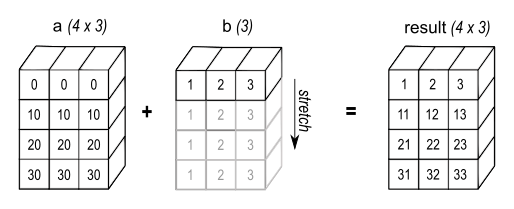
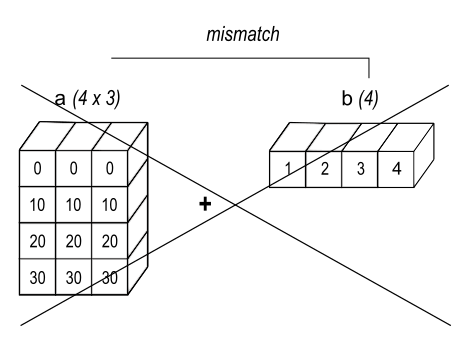

In [11]:
# NumPy
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [12]:
# NumPy
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [13]:
# Pytorch
A = torch.tensor([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
B = torch.tensor([1.0, 2.0, 3.0])
D = A+B
print(D)

tensor([[ 1.,  2.,  3.],
        [11., 12., 13.],
        [21., 22., 23.],
        [31., 32., 33.]])


In [14]:
# Pytorch
A = torch.tensor([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
B = torch.tensor([1.0, 2.0, 3.0,4.0])
D = A+B
print(D)

RuntimeError: The size of tensor a (3) must match the size of tensor b (4) at non-singleton dimension 1

## eg3
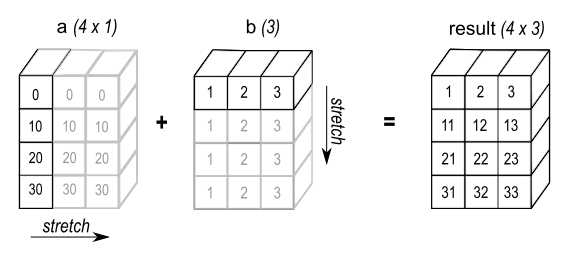

In [15]:
# NumPy
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [18]:
# NumPy
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [19]:
#Pytorch
A = torch.tensor([0.0, 10.0, 20.0, 30.0])
B = torch.tensor([1.0, 2.0, 3.0])
D = A.unsqueeze(1) + B
print(D)

tensor([[ 1.,  2.,  3.],
        [11., 12., 13.],
        [21., 22., 23.],
        [31., 32., 33.]])


In [20]:
#Pytorch
A = torch.tensor([0.0, 10.0, 20.0, 30.0])
B = torch.tensor([1.0, 2.0, 3.0])
D = A + B
print(D)

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

**Here are some more example**

A      (2d array):  5 x 4

B      (1d array):     1

Result (2d array):   5 x 4



A      (2d array):  5 x 4

B      (1d array):     4

Result (2d array):   5 x 4



A      (3d array):  15 x 3 x 5

B      (3d array):  15 x 1 x 5

Result (3d array):   15 x 3 x 5



A      (3d array):  15 x 3 x 5

B      (2d array):     3 x 5

Result (3d array):   15 x 3 x 5



A      (3d array):  15 x 3 x 5

B      (2d array):     3 x 1

Result (3d array):   15 x 3 x 5